In [1]:
import os
import torch
import numpy as np
import utils
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from torch.utils.data import TensorDataset, DataLoader

In [2]:
def get_latent_concept(concept_load_path, vae_load_path, device, vae_hidden_dim=256, vae_latent_dim=128, batch_size=256):
    x_train = np.load(f"{concept_load_path}/train_concepts.npy")
    y_train = np.load(f"{concept_load_path}/train_y.npy")
    x_test = np.load(f"{concept_load_path}/val_concepts.npy")
    y_test = np.load(f"{concept_load_path}/val_y.npy")
 
    x_train = np.reshape(x_train, (len(x_train), -1))
    x_test = np.reshape(x_test, (len(x_test), -1))
    train_dataset = TensorDataset(torch.from_numpy(x_train), torch.from_numpy(y_train))
    test_dataset = TensorDataset(torch.from_numpy(x_test), torch.from_numpy(y_test))

    input_dim = train_dataset[0][0].shape[0]

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    vae = utils.load_vae(vae_load_path, input_dim, vae_hidden_dim, vae_latent_dim).double().to(device)
    latent_emb = []
    labels = []

    for batch_idx, (data, label) in enumerate(train_loader):
        with torch.no_grad():
            data = data.squeeze().to(device).double()
            vae.forward(data)
        latent_emb.append(vae.get_z().detach().cpu().numpy())
        labels.append(label.cpu().numpy())

    latent_emb = np.concatenate(latent_emb, axis=0)
    labels = np.concatenate(labels, axis=0)
    return latent_emb, labels

def sample(latent_emb, labels, samples_per_class=1000):
    sampled_indices = []

    for class_label in range(10):
        class_indices = np.where(labels == class_label)[0]
        sampled_class_indices = np.random.choice(class_indices, samples_per_class, replace=False)
        sampled_indices.extend(sampled_class_indices)

    sampled_data = latent_emb[sampled_indices]
    sampled_labels = labels[sampled_indices]
    return sampled_data, sampled_labels

def apply_tsne(sampled_data):
    tsne = TSNE(n_components=2, random_state=42)
    reduced_data = tsne.fit_transform(sampled_data)
    return reduced_data

## CIFAR10 - RN50

In [3]:
concept_load_path = 'saved_models_gpt4/cifar10/rn50-z128/cbm_clip_RN50'
vae_load_path = 'saved_models_gpt4/cifar10/rn50-z128/vae/both_z128_bn_e75.pth'
batch_size = 256
vae_hidden_dim = 256
vae_latent_dim = 128
device = torch.device('cuda:1')

In [4]:
atent_emb, labels = get_latent_concept(concept_load_path, vae_load_path, device)
sampled_data, sampled_labels = sample(atent_emb, labels)
rn50_reduced_data = apply_tsne(sampled_data)

/home/liu/.pyenv/versions/3.9.10/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/liu/.pyenv/versions/3.9.10/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/liu/.pyenv/versions/3.9.10/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/liu/.pyenv/versions/3.9.10/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

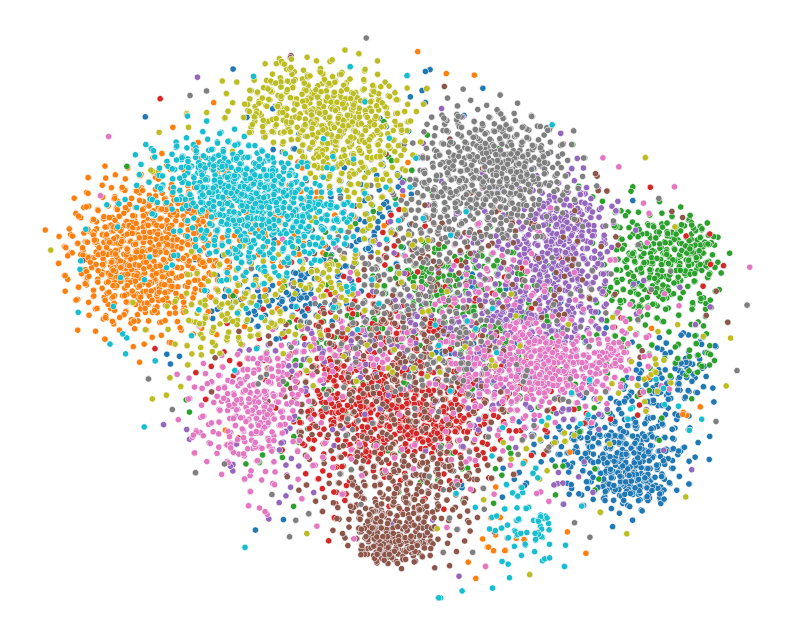

In [5]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=rn50_reduced_data[:, 0], y=rn50_reduced_data[:, 1], hue=sampled_labels, palette="tab10", legend=None, s=20)
plt.xlabel('')
plt.ylabel('')
plt.xticks([])
plt.yticks([])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.savefig('plot_figures/cifar10_rn50_tsne.png', format='png', dpi=300)
plt.savefig('plot_figures/cifar10_rn50_tsne.eps', format='eps')
# plt.savefig('plot_figures/cifar10_rn50_tsne.pdf', format='pdf', bbox_inches='tight')

## CIFAR10 - ViT-B-16

In [6]:
concept_load_path = 'saved_models_gpt4/cifar10/vit-b-z128/cbm_clip_ViT-B/16'
vae_load_path = 'saved_models_gpt4/cifar10/vit-b-z128/vae/both_z128_bn_e350.pth'
batch_size = 256
vae_hidden_dim = 256
vae_latent_dim = 128
device = torch.device('cuda:1')

atent_emb, labels = get_latent_concept(concept_load_path, vae_load_path, device)
vitb16_sampled_data, vitb16_sampled_labels = sample(atent_emb, labels)
vitb16_reduced_data = apply_tsne(vitb16_sampled_data)

/home/liu/.pyenv/versions/3.9.10/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/liu/.pyenv/versions/3.9.10/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/liu/.pyenv/versions/3.9.10/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/liu/.pyenv/versions/3.9.10/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

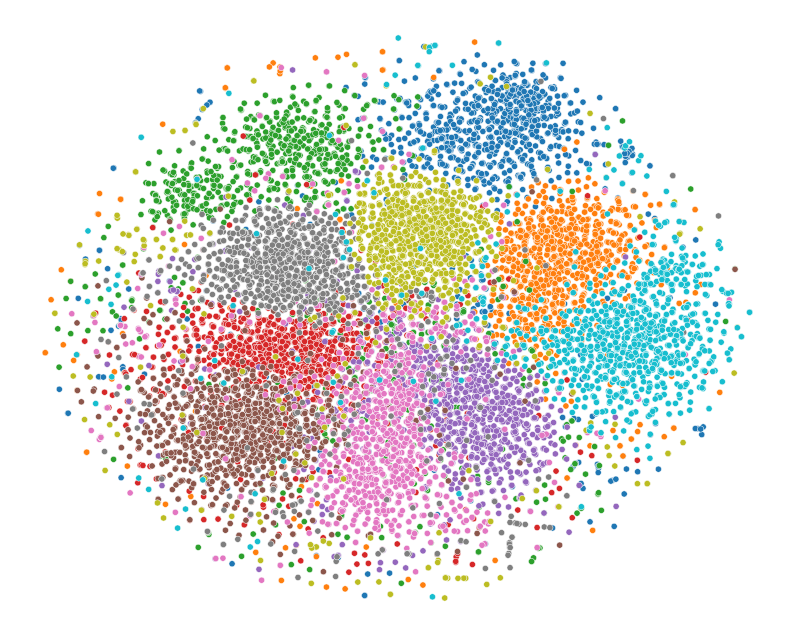

In [7]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=vitb16_reduced_data[:, 0], y=vitb16_reduced_data[:, 1], hue=vitb16_sampled_labels, palette="tab10", legend=None, s=20)
plt.xlabel('')
plt.ylabel('')
plt.xticks([])
plt.yticks([])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.savefig('plot_figures/cifar10_vitb16_tsne.png', format='png', dpi=300)
plt.savefig('plot_figures/cifar10_vitb16_tsne.eps', format='eps')
# plt.savefig('plot_figures/cifar10_vitb16_tsne.pdf', format='pdf', bbox_inches='tight')

## CIFAR10 - ViT-L-14

In [8]:
concept_load_path = 'saved_models_gpt4/cifar10/vit-l-z128/cbm_clip_ViT-L/14'
vae_load_path = 'saved_models_gpt4/cifar10/vit-l-z128/vae/both_z128_bn_e450.pth'
batch_size = 256
vae_hidden_dim = 256
vae_latent_dim = 128
device = torch.device('cuda:1')

atent_emb, labels = get_latent_concept(concept_load_path, vae_load_path, device)
vitl14_sampled_data, vitl14_sampled_labels = sample(atent_emb, labels)
vitl14_reduced_data = apply_tsne(vitl14_sampled_data)

/home/liu/.pyenv/versions/3.9.10/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/liu/.pyenv/versions/3.9.10/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/liu/.pyenv/versions/3.9.10/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/liu/.pyenv/versions/3.9.10/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

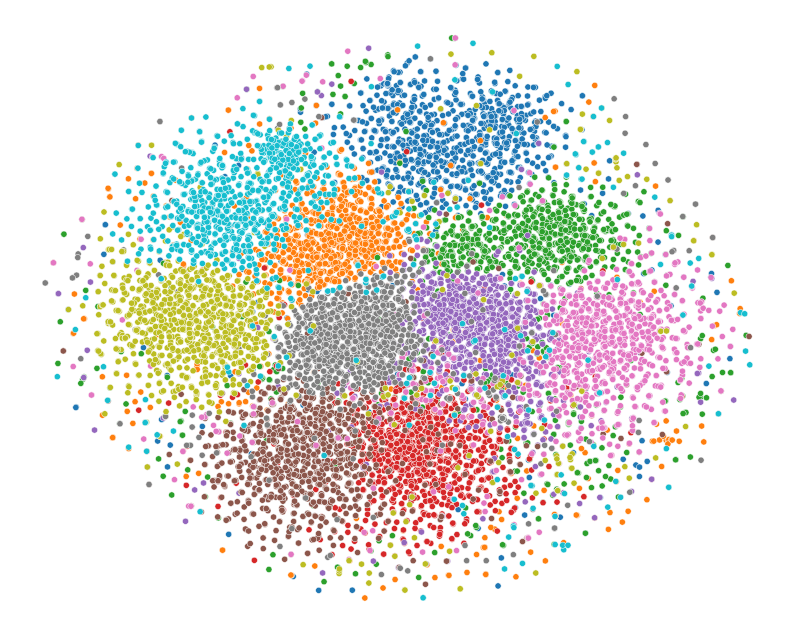

In [9]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=vitl14_reduced_data[:, 0], y=vitl14_reduced_data[:, 1], hue=vitl14_sampled_labels, palette="tab10", legend=None, s=20)
plt.xlabel('')
plt.ylabel('')
plt.xticks([])
plt.yticks([])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.savefig('plot_figures/cifar10_vitl14_tsne.png', format='png', dpi=300)
plt.savefig('plot_figures/cifar10_vitl14_tsne.eps', format='eps')
# plt.savefig('plot_figures/cifar10_vitl14_tsne.pdf', format='pdf', bbox_inches='tight')